8.854187817620389e-12
[4.00000000e-07 4.01010101e-07 4.02020202e-07 4.03030303e-07
 4.04040404e-07 4.05050505e-07 4.06060606e-07 4.07070707e-07
 4.08080808e-07 4.09090909e-07 4.10101010e-07 4.11111111e-07
 4.12121212e-07 4.13131313e-07 4.14141414e-07 4.15151515e-07
 4.16161616e-07 4.17171717e-07 4.18181818e-07 4.19191919e-07
 4.20202020e-07 4.21212121e-07 4.22222222e-07 4.23232323e-07
 4.24242424e-07 4.25252525e-07 4.26262626e-07 4.27272727e-07
 4.28282828e-07 4.29292929e-07 4.30303030e-07 4.31313131e-07
 4.32323232e-07 4.33333333e-07 4.34343434e-07 4.35353535e-07
 4.36363636e-07 4.37373737e-07 4.38383838e-07 4.39393939e-07
 4.40404040e-07 4.41414141e-07 4.42424242e-07 4.43434343e-07
 4.44444444e-07 4.45454545e-07 4.46464646e-07 4.47474747e-07
 4.48484848e-07 4.49494949e-07 4.50505051e-07 4.51515152e-07
 4.52525253e-07 4.53535354e-07 4.54545455e-07 4.55555556e-07
 4.56565657e-07 4.57575758e-07 4.58585859e-07 4.59595960e-07
 4.60606061e-07 4.61616162e-07 4.62626263e-07 4.63636364e-07
 4

(4e-07, 5e-07)

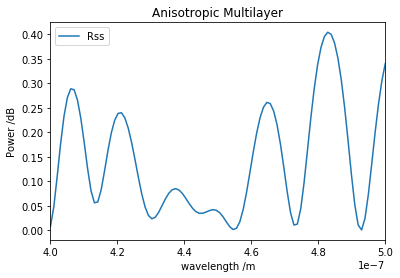

In [27]:
%matplotlib inline

import numpy
import EMpy
import pylab

# define the multilayer
#epsilon = [1.0 ** 2 * EMpy.constants.eps0 * numpy.eye(3),
#           EMpy.constants.eps0 * numpy.diag([2.1, 2.0, 1.9]),
#           2.3 ** 2 * EMpy.constants.eps0 * numpy.eye(3),
#           4.3 ** 2 * EMpy.constants.eps0 * numpy.eye(3),
#           3.0 ** 2 * EMpy.constants.eps0 * numpy.eye(3)]
#epsilon = [1.0 ** 2  * numpy.eye(3),
#        numpy.diag([2.1, 2.0, 1.9]),
#           2.3 ** 2 * numpy.eye(3),
#           4.3 ** 2 *  numpy.eye(3),
#           3.0 ** 2 * numpy.eye(3)]
layer1 = 1.0 ** 2 *EMpy.constants.eps0* numpy.eye(3)
layer2 = EMpy.constants.eps0* numpy.diag([2.1, 2.0, 1.9])
layer3 = EMpy.constants.eps0* 2.3 ** 2 * numpy.eye(3)
layer4 = EMpy.constants.eps0* 4.3 ** 2 *  numpy.eye(3)
layer5 = EMpy.constants.eps0* 3.0 ** 2 * numpy.eye(3)
print( EMpy.constants.eps0)
epsilon = [layer1,layer2,layer3,layer4,layer5]

d = numpy.array([numpy.inf, 1e-6, 2.3e-6, 0.1e-6, numpy.inf])

aniso_layers = EMpy.utils.Multilayer()
for i in range(len(epsilon)):
    eps = EMpy.materials.EpsilonTensor(epsilon[i] * numpy.eye(3))
    mat = EMpy.materials.AnisotropicMaterial('layer_%d' % i, eps)
    layer = EMpy.utils.Layer(mat, d[i])
    aniso_layers.append(layer)
    

# define the planewave
theta_inc_x = EMpy.utils.deg2rad(0)
theta_inc_y = 0.
wls = numpy.linspace(4e-7, 5e-7, 100)
print(wls)

#print(aniso_layers)
# solve
tm = EMpy.transfer_matrix.AnisotropicTransferMatrix(
    aniso_layers,
    theta_inc_x,
    theta_inc_y)
solution_aniso = tm.solve(wls)
print(solution_aniso.R[0,0,0])
#print(solution_aniso.wls)
#print(solution_aniso)
# plot
pylab.figure()
pylab.plot(wls, solution_aniso.R[0, 0, :])#,
#           wls, solution_aniso.R[1, 0, :],
#           wls, solution_aniso.R[0, 1, :],
###           wls, solution_aniso.R[1, 1, :],
#           wls, solution_aniso.T[0, 0, :],
#           wls, solution_aniso.T[1, 0, :],
#           wls, solution_aniso.T[0, 1, :],
#           wls, solution_aniso.T[1, 1, :])
pylab.legend(('Rss', 'Rps', 'Rsp', 'Rpp', 'Tss', 'Tps', 'Tsp', 'Tpp'))
pylab.title('Anisotropic Multilayer')
pylab.xlabel('wavelength /m')
pylab.ylabel('Power /dB')
pylab.xlim(wls.min(), wls.max())
#pylab.show()


In [20]:
for i , j in enumerate(range(5)):
    print(i+1)
    print(j)


1
0
2
1
3
2
4
3
5
4
